In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a folder to save the plots
output_folder = "plots_2024"
os.makedirs(output_folder, exist_ok=True)

# Load the CSV file
df = pd.read_csv('2023-2024-2025-SOCAT-1.csv', parse_dates=['date time'])

# Filter only rows from the year 2024
df = df[df['date time'].dt.year == 2024]

# Define variables and their corresponding QC columns
variables = {
    'SST [degC]': 'SST [ deg C ] QC Flag',
    'Salinity': 'Salinity [ PSU ] QC Flag',
    'pCO2 [uatm]': 'pCO2_water_SST_wet [ uatm ] QC Flag',
    #'fCO2 [uatm]': 'fCO2_water_SST_wet [ uatm ] QC Flag',
    'DOXY [ml-L]': 'DOXY_1_QC',
}

# Maximum allowed time gap (in seconds) for a continuous line
max_gap_seconds = 86400  # 1 day

for var, qc_col in variables.items():
    if qc_col in df.columns:
        # Keep only rows with QC == 2
        filtered = df[df[qc_col] == 2].copy()

        # Sort by timestamp in case it's not ordered
        filtered = filtered.sort_values('date time')

        # Calculate time difference between consecutive rows
        time_diff = filtered['date time'].diff().dt.total_seconds()

        # Insert NaN where time gap exceeds threshold
        filtered.loc[time_diff > max_gap_seconds, var] = np.nan

        # Plot
        plt.figure(figsize=(10, 4))
        plt.plot(filtered['date time'], filtered[var], label=var)
        plt.xlabel('Timestamp')
        plt.ylabel(var)
        plt.title(f'{var} in 2024')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()

        # Save the plot
        plot_filename = os.path.join(output_folder, f"{var.replace(' ', '_')}_2024.png")
        plt.savefig(plot_filename)
        plt.close()  # Close the plot to free memory
    else:
        print(f"QC column '{qc_col}' not found for variable '{var}'. Skipping plot.")

In [17]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('2023-2024-2025-SOCAT-1.csv', parse_dates=['date time'])

# Filter only rows from the year 2024
df = df[df['date time'].dt.year == 2024]

# Define the variables and their corresponding QC columns
variables_with_qc = {
    'SST [degC]': 'SST [ deg C ] QC Flag',
    'Salinity': 'Salinity [ PSU ] QC Flag',
    'pCO2 [uatm]': 'pCO2_water_SST_wet [ uatm ] QC Flag',
    'DOXY [ml-L]': 'DOXY_1_QC',
}

# Ensure the variables and their QC columns exist in the DataFrame
columns_to_include = ['date time'] + [
    var for var in variables_with_qc.keys() if var in df.columns
] + [
    qc for qc in variables_with_qc.values() if qc in df.columns
]
df = df[columns_to_include]

# Set 'date time' as the index
df.set_index('date time', inplace=True)

# Resample the data to 4-hour intervals and calculate the mean
df_resampled = df.resample('4H').mean()

# Reset the index to make 'date time' a column again
df_resampled.reset_index(inplace=True)

# Save the resampled DataFrame to a new CSV file
output_csv = '2024_4hour_averaged_data_with_QC.csv'
df_resampled.to_csv(output_csv, index=False)

print(f"4-hour averaged data with QC saved to {output_csv}")

4-hour averaged data with QC saved to 2024_4hour_averaged_data_with_QC.csv


C:\Users\nikol\AppData\Local\Temp\ipykernel_5788\1686679350.py:4: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('2023-2024-2025-SOCAT-1.csv', parse_dates=['date time'])
C:\Users\nikol\AppData\Local\Temp\ipykernel_5788\1686679350.py:29: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_resampled = df.resample('4H').mean()


In [5]:
import pandas as pd

# Convert liu_data dictionary to a DataFrame
liu_data = {
    'date time': [
        '2024-01-17', '2024-01-17', '2024-01-17', '2024-01-17',
        '2024-02-14', '2024-02-14', '2024-02-14', '2024-02-14',
        '2024-03-07', '2024-03-07', '2024-03-07', '2024-03-07',
        '2024-04-17', '2024-04-17', '2024-04-17', '2024-04-17',
        '2024-05-16', '2024-05-16', '2024-05-16', '2024-05-16',
        '2024-06-18', '2024-06-18', '2024-06-18', '2024-06-18',
        '2024-07-16', '2024-07-16', '2024-07-16', '2024-07-16',
        '2024-08-04', '2024-08-04', '2024-08-04', '2024-08-04',
        '2024-09-25', '2024-09-25', '2024-09-25', '2024-09-25',
        '2024-11-18', '2024-11-18', '2024-11-18', '2024-11-18',
        '2024-12-16', '2024-12-16', '2024-12-16', '2024-12-16'
    ],
    'pCO2 (Liu)': [
        356.4, 356.7, 355.1, 357.6,
        339.5, 337.3, 338.5, 363.8,
        345.8, 346.3, 346.7, 366.3,
        317.2, 317.1, 319.5, 378.2,
        340.3, 339.1, 337.9, 409.4,
        317.6, 319.3, 319.1, 437.1,
        358.0, 358.1, 356.6, 542.1,
        455.0, 455.1, 455.3, 519.7,
        467.7, 465.2, 470.1, 554.4,
        376.9, 377.9, 377.3, 372.6,
        363.4, 363.6, 362.4, 363.2
    ]
}

liu_df = pd.DataFrame(liu_data)

# Convert 'date time' to datetime format
liu_df['date time'] = pd.to_datetime(liu_df['date time'])

# Group by date and calculate the daily average
daily_avg_liu = liu_df.groupby(liu_df['date time'].dt.date)['pCO2 (Liu)'].mean().reset_index()

# Rename columns for clarity
daily_avg_liu.columns = ['date', 'daily_avg_pCO2 (Liu)']

# Display the result
print(daily_avg_liu)

          date  daily_avg_pCO2 (Liu)
0   2024-01-17               356.450
1   2024-02-14               344.775
2   2024-03-07               351.275
3   2024-04-17               333.000
4   2024-05-16               356.675
5   2024-06-18               348.275
6   2024-07-16               403.700
7   2024-08-04               471.275
8   2024-09-25               489.350
9   2024-11-18               376.175
10  2024-12-16               363.150


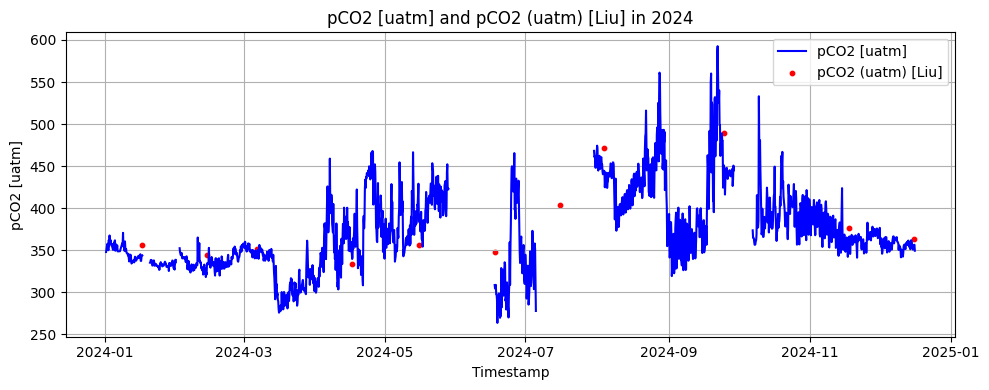

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Discrete data points for "pCO2 (Liu)"
liu_data = {
    'date time': [
        '2024-01-17', '2024-01-17', '2024-01-17', '2024-01-17',
        '2024-02-14', '2024-02-14', '2024-02-14', '2024-02-14',
        '2024-03-07', '2024-03-07', '2024-03-07', '2024-03-07',
        '2024-04-17', '2024-04-17', '2024-04-17', '2024-04-17',
        '2024-05-16', '2024-05-16', '2024-05-16', '2024-05-16',
        '2024-06-18', '2024-06-18', '2024-06-18', '2024-06-18',
        '2024-07-16', '2024-07-16', '2024-07-16', '2024-07-16',
        '2024-08-04', '2024-08-04', '2024-08-04', '2024-08-04',
        '2024-09-25', '2024-09-25', '2024-09-25', '2024-09-25',
        '2024-11-18', '2024-11-18', '2024-11-18', '2024-11-18',
        '2024-12-16', '2024-12-16', '2024-12-16', '2024-12-16'
    ],
    'pCO2 (Liu)': [
        356.4, 356.7, 355.1, 357.6,
        339.5, 337.3, 338.5, 363.8,
        345.8, 346.3, 346.7, 366.3,
        317.2, 317.1, 319.5, 378.2,
        340.3, 339.1, 337.9, 409.4,
        317.6, 319.3, 319.1, 437.1,
        358.0, 358.1, 356.6, 542.1,
        455.0, 455.1, 455.3, 519.7,
        467.7, 465.2, 470.1, 554.4,
        376.9, 377.9, 377.3, 372.6,
        363.4, 363.6, 362.4, 363.2
    ]
}

liu_data = {
    "date time": [
        "2024-01-17", "2024-02-14", "2024-03-07", "2024-04-17",
        "2024-05-16", "2024-06-18", "2024-07-16", "2024-08-04",
        "2024-09-25", "2024-11-18", "2024-12-16"
    ],
    "pCO2 (Liu)": [
        356.450, 344.775, 351.275, 333.000,
        356.675, 348.275, 403.700, 471.275,
        489.350, 376.175, 363.150
    ]
}
import pandas as pd
import matplotlib.pyplot as plt

# Convert liu_data dictionary to a DataFrame
liu_df = pd.DataFrame(liu_data)
liu_df['date time'] = pd.to_datetime(liu_df['date time'])  # Ensure 'date time' is in datetime format

# Define the maximum allowed time gap for a continuous line
max_gap_seconds = 86400  # 1 day

# Filter only rows where QC for pCO2 is 2
if 'pCO2_water_SST_wet [ uatm ] QC Flag' in df.columns:
    filtered = df[df['pCO2_water_SST_wet [ uatm ] QC Flag'] == 2].copy()
    filtered = filtered.sort_values('date time')

    # Calculate time difference between consecutive rows
    time_diff = filtered['date time'].diff().dt.total_seconds()

    # Insert NaN where time gap exceeds the threshold
    filtered.loc[time_diff > max_gap_seconds, 'pCO2 [uatm]'] = np.nan

# Create the plot
fig, ax = plt.subplots(figsize=(10, 4))

# Plot pCO2 [uatm]
ax.plot(filtered['date time'], filtered['pCO2 [uatm]'], color='blue', label='pCO2 [uatm]')

# Plot pCO2 (Liu)
ax.scatter(liu_df['date time'], liu_df['pCO2 (Liu)'], color='red', label='pCO2 (uatm) [Liu]', s=10)

# Set labels and title
ax.set_ylabel('pCO2 [uatm]')
ax.set_xlabel('Timestamp')
ax.set_title('pCO2 [uatm] and pCO2 (uatm) [Liu] in 2024')

# Add grid, legend, and layout adjustments
ax.grid(True)
ax.legend()
fig.tight_layout()

# Show the plot
plt.show()

In [19]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a folder to save the plots
output_folder = "plots_2024"
os.makedirs(output_folder, exist_ok=True)

# Load the new CSV file with daily averaged data
df = pd.read_csv('daily_averaged_data.csv')

# Ensure 'date time' is a datetime object with the correct format
df['date time'] = pd.to_datetime(df['date time'], format='%d/%m/%Y', errors='coerce')

# Drop rows where 'date time' could not be converted
df = df.dropna(subset=['date time'])

# Filter only rows from the year 2024
df = df[df['date time'].dt.year == 2024]

# Define variables and their corresponding QC columns
variables = {
    'SST [degC]': 'SST [ deg C ] QC Flag',
    'Salinity': 'Salinity [ PSU ] QC Flag',
    'pCO2 [uatm]': 'pCO2_water_SST_wet [ uatm ] QC Flag',
    #'fCO2 [uatm]': 'fCO2_water_SST_wet [ uatm ] QC Flag',
    'DOXY [ml-L]': 'DOXY_1_QC',
}

# Maximum allowed time gap (in seconds) for a continuous line
max_gap_seconds = 86400  # 1 day

for var, qc_col in variables.items():
    if qc_col in df.columns:
        # Keep only rows with QC == 2
        filtered = df[df[qc_col] == 2].copy()

        # Sort by timestamp in case it's not ordered
        filtered = filtered.sort_values('date time')

        # Calculate time difference between consecutive rows
        time_diff = filtered['date time'].diff().dt.total_seconds()

        # Insert NaN where time gap exceeds threshold
        filtered.loc[time_diff > max_gap_seconds, var] = np.nan

        # Plot
        plt.figure(figsize=(10, 4))
        plt.plot(filtered['date time'], filtered[var], label=var)
        plt.xlabel('Timestamp')
        plt.ylabel(var)
        plt.title(f'{var} in 2024 (Daily Averaged)')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()

        # Save the plot
        plot_filename = os.path.join(output_folder, f"{var.replace(' ', '_')}_2024_daily_averaged.png")
        plt.savefig(plot_filename)
        plt.close()  # Close the plot to free memory
    else:
        print(f"QC column '{qc_col}' not found for variable '{var}'. Skipping plot.")

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

# Create a folder to save the plots
output_folder = "plots_2024_combinations"
os.makedirs(output_folder, exist_ok=True)

# Load the new CSV file with daily averaged data
df = pd.read_csv('daily_averaged_data.csv')

# Ensure 'date time' is a datetime object with the correct format
df['date time'] = pd.to_datetime(df['date time'], format='%d/%m/%Y', errors='coerce')

# Drop rows where 'date time' could not be converted
df = df.dropna(subset=['date time'])

# Filter only rows from the year 2024
df = df[df['date time'].dt.year == 2024]

# Define variables and their corresponding QC columns
variables = {
    'SST [degC]': 'SST [ deg C ] QC Flag',
    'Salinity': 'Salinity [ PSU ] QC Flag',
    'pCO2 [uatm]': 'pCO2_water_SST_wet [ uatm ] QC Flag',
    #'fCO2 [uatm]': 'fCO2_water_SST_wet [ uatm ] QC Flag',
    'DOXY [ml-L]': 'DOXY_1_QC',
}

# Maximum allowed time gap (in seconds) for a continuous line
max_gap_seconds = 86400  # 1 day

# Generate all combinations of variables
variable_combinations = list(combinations(variables.keys(), 2))

for var1, var2 in variable_combinations:
    qc_col1 = variables[var1]
    qc_col2 = variables[var2]

    if qc_col1 in df.columns and qc_col2 in df.columns:
        # Keep only rows with QC == 2 for both variables
        filtered = df[(df[qc_col1] == 2) & (df[qc_col2] == 2)].copy()

        # Sort by timestamp in case it's not ordered
        filtered = filtered.sort_values('date time')

        # Calculate time difference between consecutive rows
        time_diff = filtered['date time'].diff().dt.total_seconds()

        # Insert NaN where time gap exceeds threshold
        filtered.loc[time_diff > max_gap_seconds, [var1, var2]] = np.nan

        # Plot with dual y-axes
        fig, ax1 = plt.subplots(figsize=(10, 4))

        # Left y-axis
        ax1.plot(filtered['date time'], filtered[var1], label=var1, color='blue')
        ax1.set_ylabel(var1, color='blue')
        ax1.tick_params(axis='y', labelcolor='blue')

        # Right y-axis
        ax2 = ax1.twinx()
        ax2.plot(filtered['date time'], filtered[var2], label=var2, color='green')
        ax2.set_ylabel(var2, color='green')
        ax2.tick_params(axis='y', labelcolor='green')

        # Title and grid
        plt.title(f'{var1} and {var2} in 2024 (Daily Averaged)')
        ax1.set_xlabel('Timestamp')
        ax1.grid(True)

        # Save the plot
        plot_filename = os.path.join(output_folder, f"{var1.replace(' ', '_')}_and_{var2.replace(' ', '_')}_2024_daily_averaged.png")
        plt.tight_layout()
        plt.savefig(plot_filename)
        plt.close()  # Close the plot to free memory
    else:
        print(f"QC columns for '{var1}' or '{var2}' not found. Skipping plot.")

In [33]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create a folder to save the plots
output_folder = "4_hour_plots_2024"
os.makedirs(output_folder, exist_ok=True)

# Load the CSV file
df = pd.read_csv('4_hour_averaged_data.csv', parse_dates=['date time'])

# Filter only rows from the year 2024
df = df[df['date time'].dt.year == 2024]

# Define variables and their corresponding QC columns
variables = {
    'SST [degC]': 'SST [ deg C ] QC Flag',
    'Salinity': 'Salinity [ PSU ] QC Flag',
    'pCO2 [uatm]': 'pCO2_water_SST_wet [ uatm ] QC Flag',
    #'fCO2 [uatm]': 'fCO2_water_SST_wet [ uatm ] QC Flag',
    'DOXY [ml-L]': 'DOXY_1_QC',
}

# Maximum allowed time gap (in seconds) for a continuous line
max_gap_seconds = 86400  # 1 day

for var, qc_col in variables.items():
    if qc_col in df.columns:
        # Keep only rows with QC == 2
        filtered = df[df[qc_col] == 2].copy()

        # Sort by timestamp in case it's not ordered
        filtered = filtered.sort_values('date time')

        # Calculate time difference between consecutive rows
        time_diff = filtered['date time'].diff().dt.total_seconds()

        # Insert NaN where time gap exceeds threshold
        filtered.loc[time_diff > max_gap_seconds, var] = np.nan

        # Plot
        plt.figure(figsize=(10, 4))
        plt.plot(filtered['date time'], filtered[var], label=var)
        plt.xlabel('Timestamp')
        plt.ylabel(var)
        plt.title(f'{var} in 2024 (4 hour average)')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()

        # Save the plot
        plot_filename = os.path.join(output_folder, f"{var.replace(' ', '_')}_(4 hour average)_2024.png")
        plt.savefig(plot_filename)
        plt.close()  # Close the plot to free memory
    else:
        print(f"QC column '{qc_col}' not found for variable '{var}'. Skipping plot.")

In [24]:
print(df.head())  # Check the first few rows of the DataFrame
print(df.shape)   # Check the number of rows and columns

Empty DataFrame
Columns: [date time, SST [degC], Salinity, pCO2 [uatm], DOXY [ml-L], SST [ deg C ] QC Flag, Salinity [ PSU ] QC Flag, pCO2_water_SST_wet [ uatm ] QC Flag, DOXY_1_QC]
Index: []
(0, 9)


In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

# Create a folder to save the plots
output_folder = "variable_combinations_plots_2024"
os.makedirs(output_folder, exist_ok=True)

# Load the CSV file
df = pd.read_csv('4_hour_averaged_data.csv', parse_dates=['date time'])

# Filter only rows from the year 2024
df = df[df['date time'].dt.year == 2024]

# Define variables and their corresponding QC columns
variables = {
    'SST [degC]': 'SST [ deg C ] QC Flag',
    'Salinity': 'Salinity [ PSU ] QC Flag',
    'pCO2 [uatm]': 'pCO2_water_SST_wet [ uatm ] QC Flag',
    'DOXY [ml-L]': 'DOXY_1_QC',
}

# Maximum allowed time gap (in seconds) for a continuous line
max_gap_seconds = 86400  # 1 day

# Generate all combinations of variables
variable_combinations = list(combinations(variables.keys(), 2))

for var1, var2 in variable_combinations:
    qc_col1 = variables[var1]
    qc_col2 = variables[var2]

    if qc_col1 in df.columns and qc_col2 in df.columns:
        # Keep only rows with QC == 2 for both variables
        filtered = df[(df[qc_col1] == 2) & (df[qc_col2] == 2)].copy()

        # Sort by timestamp in case it's not ordered
        filtered = filtered.sort_values('date time')

        # Calculate time difference between consecutive rows
        time_diff = filtered['date time'].diff().dt.total_seconds()

        # Insert NaN where time gap exceeds threshold
        filtered.loc[time_diff > max_gap_seconds, [var1, var2]] = np.nan

        # Plot with dual y-axes
        fig, ax1 = plt.subplots(figsize=(10, 4))

        # Left y-axis
        ax1.plot(filtered['date time'], filtered[var1], label=var1, color='blue')
        ax1.set_ylabel(var1, color='blue')
        ax1.tick_params(axis='y', labelcolor='blue')

        # Right y-axis
        ax2 = ax1.twinx()
        ax2.plot(filtered['date time'], filtered[var2], label=var2, color='green')
        ax2.set_ylabel(var2, color='green')
        ax2.tick_params(axis='y', labelcolor='green')

        # Title and grid
        plt.title(f'{var1} and {var2} in 2024 (4 hour average)')
        ax1.set_xlabel('Timestamp')
        ax1.grid(True)

        # Save the plot
        plot_filename = os.path.join(output_folder, f"{var1.replace(' ', '_')}_and_{var2.replace(' ', '_')}_(4 hour average)_2024.png")
        plt.tight_layout()
        plt.savefig(plot_filename)
        plt.close()  # Close the plot to free memory
    else:
        print(f"QC columns for '{var1}' or '{var2}' not found. Skipping plot.")